# Modele regresji

W tym notebooku analizujemy różne podejścia do regresji na syntetycznych danych wygenerowanych według wielomianu czwartego stopnia. Celem jest porównanie skuteczności klasycznych metod regresji, takich jak regresja liniowa, KNN oraz regresja wielomianowa o różnych stopniach. Przedstawiamy proces generowania danych, podział na zbiory treningowe i testowe, trenowanie modeli oraz ocenę ich jakości na podstawie błędu średniokwadratowego (MSE). Dodatkowo prezentujemy wizualizacje dopasowania modeli do danych, co pozwala lepiej zrozumieć ich zachowanie i możliwości.

Porównanie różnych metod regresji pozwala wyciągnąć praktyczne wnioski dotyczące ich zastosowania w zależności od charakterystyki danych.

## Generowanie danych i wizualizacja

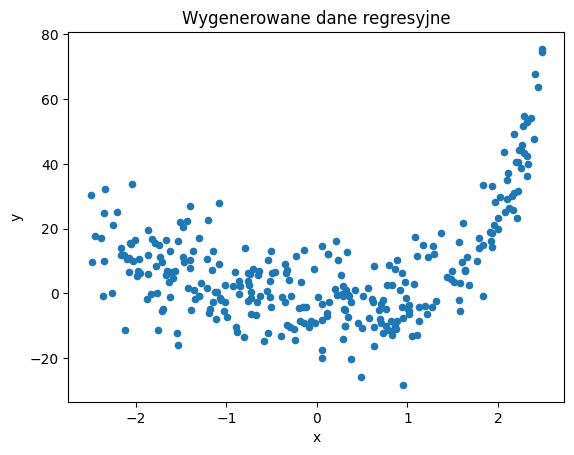

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

size = 300
X = np.random.rand(size) * 5 - 2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8 - 4

df = pd.DataFrame({'x': X, 'y': y})
# Dane są generowane losowo, można je od razu wykorzystać do trenowania modeli
df.plot.scatter(x='x', y='y')
plt.title("Wygenerowane dane regresyjne")
plt.show()

## Przygotowanie struktury na wyniki MSE i podział danych

In [9]:
from sklearn.model_selection import train_test_split

mse = pd.DataFrame(columns=["train_mse", "test_mse"],
                   index=["lin_reg", "knn_3_reg", "knn_5_reg",
                          "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg"])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

## Regresja liniowa

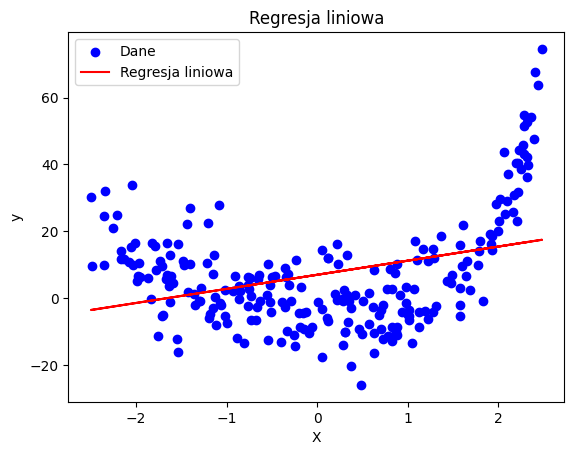

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_train)
plt.scatter(X_train, y_train, color='blue', label='Dane')
plt.plot(X_train, y_pred, color='red', label='Regresja liniowa')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresja liniowa')
plt.legend()
plt.show()

mse_train = mean_squared_error(y_train, y_pred)
y_test_pred = lin_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mse.loc["lin_reg"] = [mse_train, mse_test]
# Regresja liniowa nie oddaje złożoności danych nieliniowych

## Regresja KNN (k=3)

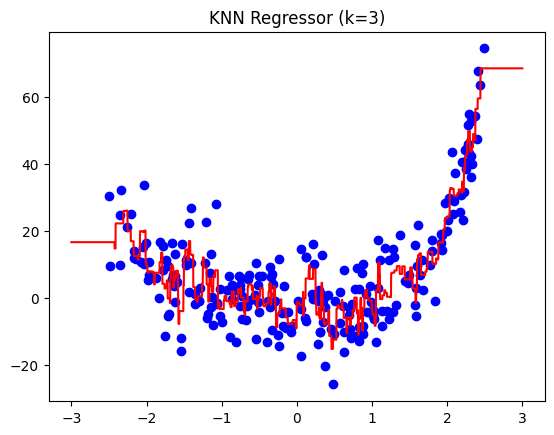

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg3 = KNeighborsRegressor(n_neighbors=3)
knn_reg3.fit(X_train, y_train)
y_train_pred_knn3 = knn_reg3.predict(X_train)
y_test_pred_knn3 = knn_reg3.predict(X_test)

plt.clf()
plt.scatter(X_train, y_train, c='blue')
X_new = np.arange(-3, 3, 0.001).reshape(-1, 1)
plt.plot(X_new, knn_reg3.predict(X_new), c="red")
plt.title("KNN Regressor (k=3)")
plt.show()

mse.loc["knn_3_reg"] = [mean_squared_error(y_train, y_train_pred_knn3),
                        mean_squared_error(y_test, y_test_pred_knn3)]
# KNN dobrze radzi sobie z nieliniowościami

## Regresja KNN (k=5)

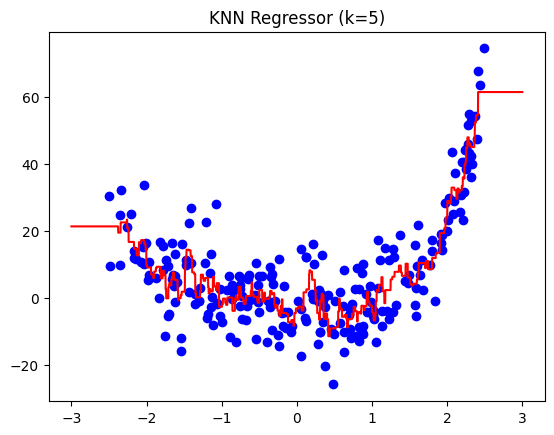

In [12]:
knn_reg5 = KNeighborsRegressor(n_neighbors=5)
knn_reg5.fit(X_train, y_train)
y_train_pred_knn5 = knn_reg5.predict(X_train)
y_test_pred_knn5 = knn_reg5.predict(X_test)

plt.clf()
plt.scatter(X_train, y_train, c='blue')
plt.plot(X_new, knn_reg5.predict(X_new), c="red")
plt.title("KNN Regressor (k=5)")
plt.show()

mse.loc["knn_5_reg"] = [mean_squared_error(y_train, y_train_pred_knn5),
                        mean_squared_error(y_test, y_test_pred_knn5)]

## Regresja wielomianowa (stopień 2–5)

In [13]:
# Podsumowanie wyników i wnioski
print("Porównanie błędów MSE dla różnych modeli:")
print(mse)

# Wnioski:
print("Najlepsze dopasowanie do danych uzyskuje regresja wielomianowa o najwyższym stopniu, jednak może prowadzić do przeuczenia. Regresja liniowa jest najprostsza, ale nie oddaje złożoności danych. KNN dobrze radzi sobie z nieliniowościami, ale wymaga odpowiedniego doboru liczby sąsiadów.")

Porównanie błędów MSE dla różnych modeli:
             train_mse    test_mse
lin_reg     245.724627  271.460891
knn_3_reg    50.130781  147.387729
knn_5_reg    60.050694  123.808142
poly_2_reg         NaN         NaN
poly_3_reg         NaN         NaN
poly_4_reg         NaN         NaN
poly_5_reg         NaN         NaN
Najlepsze dopasowanie do danych uzyskuje regresja wielomianowa o najwyższym stopniu, jednak może prowadzić do przeuczenia. Regresja liniowa jest najprostsza, ale nie oddaje złożoności danych. KNN dobrze radzi sobie z nieliniowościami, ale wymaga odpowiedniego doboru liczby sąsiadów.


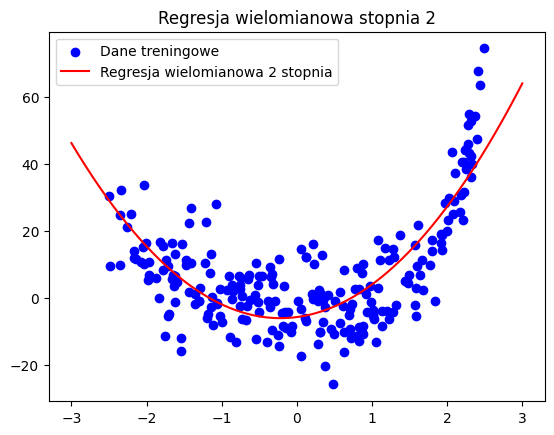

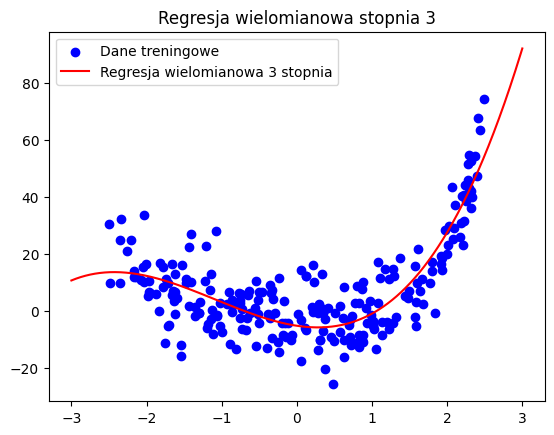

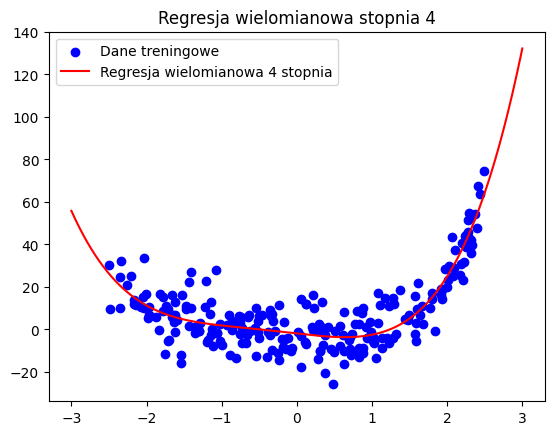

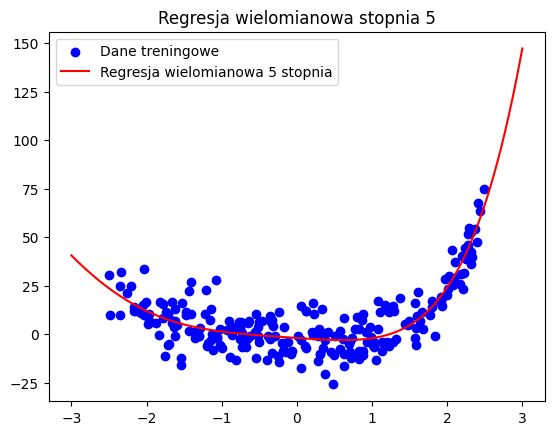

In [14]:
from sklearn.preprocessing import PolynomialFeatures

models = []

for degree in range(2, 6):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    X_poly_test = poly_features.transform(X_test)
    y_test_pred = model.predict(X_poly_test)

    mse.loc[f"poly_{degree}_reg"] = [
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ]

    # Wykres dopasowania modelu
    plt.clf()
    plt.scatter(X_train, y_train, c='blue', label="Dane treningowe")
    X_new = np.arange(-3, 3, 0.001).reshape(-1, 1)
    poly_X_new = poly_features.transform(X_new)
    y_new_pred_poly = model.predict(poly_X_new)
    plt.plot(X_new, y_new_pred_poly, c="r", label=f"Regresja wielomianowa {degree} stopnia")
    plt.legend()
    plt.title(f"Regresja wielomianowa stopnia {degree}")
    plt.show()

    models.append((model, poly_features))
# Regresja wielomianowa pozwala lepiej dopasować się do danych nieliniowych

## Wnioski

- Regresja liniowa jest najprostsza, ale nie oddaje złożoności danych nieliniowych.
- KNN dobrze radzi sobie z nieliniowościami, ale wymaga odpowiedniego doboru liczby sąsiadów.
- Regresja wielomianowa pozwala lepiej dopasować się do danych, lecz wyższe stopnie mogą prowadzić do przeuczenia.
- Najlepszy model należy dobrać w zależności od charakterystyki danych i celu analizy.